# Backpropagation in Multilayer Neural Networks

### Goals: 
- implementING a real gradient descent in `Numpy`

### Dataset:
- Similar as first Lab - Digits: 10 class handwritten digits
- [sklearn.datasets.load_digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

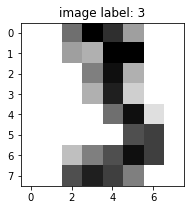

In [2]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- Normalization
- Train / test split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

In [4]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [5]:
one_hot(n_classes=10, y=3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [6]:
one_hot(n_classes=10, y=[0, 4, 9, 1])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
# norm over a column 
def softmax(X):
    exp = np.exp(X)
    return exp / np.sum(exp, axis=-1, keepdims=True)


print("softmax of a single vector:")
print(softmax([10, 2, -3]))

softmax of a single vector:
[9.99662391e-01 3.35349373e-04 2.25956630e-06]


In [8]:
# TO BE EXAMINED MORE: keepdims?!

m = 3
W = np.ones((m, 2 * m, 3 * m))

for i in range(m):
    for j in range(2 * m):
        for k in range(3 * m):
            W[i, j, k] = k
        
# np.sum(W, axis=0)
print(W)

3 * 6 * 9
np.sum(W, axis=-1, keepdims=True)

# print(W[:, 0])

[[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]]

 [[0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]]

 [[0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]]]


array([[[36.],
        [36.],
        [36.],
        [36.],
        [36.],
        [36.]],

       [[36.],
        [36.],
        [36.],
        [36.],
        [36.],
        [36.]],

       [[36.],
        [36.],
        [36.],
        [36.],
        [36.],
        [36.]]])

Probabilities should sum to 1:

In [9]:
print(np.sum(softmax([10, 2, -3])))

1.0


In [10]:
print("sotfmax of 2 vectors:")
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X))

sotfmax of 2 vectors:
[[9.99662391e-01 3.35349373e-04 2.25956630e-06]
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]]


The sum of probabilities for each input vector of logits should some to 1:

In [11]:
print(np.sum(softmax(X), axis=1))

[1. 1.]


Implement a function that given the true one-hot encoded class `Y_true` and and some predicted probabilities `Y_pred` returns the negative log likelihood.

In [15]:
# def nll(Y_true, Y_pred):
#     Y_true = np.asarray(Y_true)
#     Y_pred = np.asarray(Y_pred)

#     return -np.sum(Y_true * np.log(Y_pred))


# # Make sure that it works for a simple sample at a time
# print(nll([1, 0, 0], [.99, 0.01, 0]))

Check that the nll of a very confident yet bad prediction is a much higher positive number:

In [14]:
# print(nll([1, 0, 0], [0.01, 0.01, .98]))

Make sure that your implementation can compute the average negative log likelihood of a group of predictions: `Y_pred` and `Y_true` can therefore be past as 2D arrays:

In [16]:
# def nll(Y_true, Y_pred):
#     Y_true = np.atleast_2d(Y_true)
#     Y_pred = np.atleast_2d(Y_pred)

#     # TODO
#     return 0.

In [17]:
# # Check that the average NLL of the following 3 almost perfect
# # predictions is close to 0
# Y_true = np.array([[0, 1, 0],
#                    [1, 0, 0],
#                    [0, 0, 1]])

# Y_pred = np.array([[0,   1,    0],
#                    [.99, 0.01, 0],
#                    [0,   0,    1]])

# print(nll(Y_true, Y_pred))

In [18]:
# # %load solutions/numpy_nll.py
# EPSILON = 1e-8


# def nll(Y_true, Y_pred):
#     Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
#     loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
#     return -np.mean(loglikelihoods)


# # Make sure that it works for a simple sample at a time
# print(nll([1, 0, 0], [.99, 0.01, 0]))

# # Check that the nll of a very confident yet bad prediction
# # is very high:
# print(nll([1, 0, 0], [0.01, 0.01, .98]))

# # Check that the average NLL of the following 3 almost perfect
# # predictions is close to 0
# Y_true = np.array([[0, 1, 0],
#                    [1, 0, 0],
#                    [0, 0, 1]])

# Y_pred = np.array([[0,   1,    0],
#                    [.99, 0.01, 0],
#                    [0,   0,    1]])
# print(nll(Y_true, Y_pred))

Let us now study the following linear model trainable by SGD, **one sample at a time**.

In [19]:
# class LogisticRegression():

    
#     def __init__(self, input_size, output_size):
#         self.W = np.random.uniform(size=(input_size, output_size),
#                                    high=0.1, low=-0.1)
#         self.b = np.random.uniform(size=output_size,
#                                    high=0.1, low=-0.1)
        
#         self.output_size = output_size
        
#     def forward(self, X):
#         Z = np.dot(X, self.W) + self.b
#         return softmax(Z)
    
#     # this returns a vector 1500x1:
#     # that is the maximum prob. over axis=1 which is on [0, 1, 2, \dots, 9]
#     # and the axis=0 is say 1500 where we have 1500 images each of these
#     # image was originally 8x8 and then transformed into 1x64
#     def predict(self, X):
#         if len(X.shape) == 1:
#             return np.argmax(self.forward(X))
#         else:
#             return np.argmax(self.forward(X), axis=1)
    
#     def grad_loss(self, x, y_true):
#         y_pred = self.forward(x)
#         dnll_output =  y_pred - one_hot(self.output_size, y_true)
#         grad_W = np.outer(x, dnll_output)
#         grad_b = dnll_output
#         grads = {"W": grad_W, "b": grad_b}
        
#         return grads
    
#     def train(self, x, y, learning_rate):
#         # Traditional SGD update without momentum
#         grads = self.grad_loss(x, y)
#         self.W = self.W - learning_rate * grads["W"]
#         self.b = self.b - learning_rate * grads["b"]      
        
#     def loss(self, X, y):
#         return nll(one_hot(self.output_size, y), self.forward(X))

#     def accuracy(self, X, y):
#         y_preds = np.argmax(self.forward(X), axis=1)
#         return np.mean(y_preds == y)

In [20]:
# # Build a model and test its forward inference
# n_features = X_train.shape[1]
# n_classes  = len(np.unique(y_train))
# lr         = LogisticRegression(n_features, n_classes)

# print("Evaluation of the untrained model:")
# train_loss = lr.loss(X_train, y_train)
# train_acc  = lr.accuracy(X_train, y_train)
# test_acc   = lr.accuracy(X_test, y_test)

# print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
#       % (train_loss, train_acc, test_acc))

Evaluate the randomly initialized model on the first example:

In [21]:
# def plot_prediction(model, sample_idx=0, classes=range(10)):
#     fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#     ax0.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8), cmap=plt.cm.gray_r,
#                interpolation='nearest')
#     ax0.set_title("True image label: %d" % y_test[sample_idx]);


#     ax1.bar(classes, one_hot(len(classes), y_test[sample_idx]), label='true')
#     ax1.bar(classes, model.forward(X_test[sample_idx]), label='prediction', color="red")
#     ax1.set_xticks(classes)
#     prediction = model.predict(X_test[sample_idx])
#     ax1.set_title('Output probabilities (prediction: %d)'
#                   % prediction)
#     ax1.set_xlabel('Digit class')
#     ax1.legend()
    
# plot_prediction(lr, sample_idx=0)

In [22]:
# # Training for one epoch
# learning_rate = 0.01

# for i, (x, y) in enumerate(zip(X_train, y_train)):
#     lr.train(x, y, learning_rate)
#     if i % 100 == 0:
#         train_loss = lr.loss(X_train, y_train)
#         train_acc = lr.accuracy(X_train, y_train)
#         test_acc = lr.accuracy(X_test, y_test)
#         print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
#               % (i, train_loss, train_acc, test_acc))

Evaluate the trained model on the first example:

In [23]:
# plot_prediction(lr, sample_idx=0)

## b) Feedforward Multilayer

The objective of this section is to implement the backpropagation algorithm (SGD with the chain rule) on a single layer neural network using the sigmoid activation function.

- Implement the `sigmoid` and its element-wise derivative `dsigmoid` functions:

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

$$
dsigmoid(x) = sigmoid(x) \cdot (1 - sigmoid(x))
$$

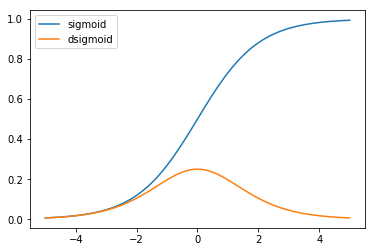

In [24]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
    

def dsigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))


x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.legend(loc='best');

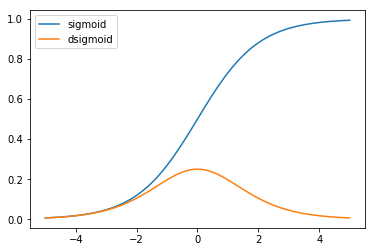

In [25]:
# %load solutions/sigmoid.py
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def dsigmoid(X):
    sig=sigmoid(X)
    return sig * (1 - sig)


x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.legend(loc='best');

- Implement `forward` and `forward_keep_all` functions for a model with a hidden layer with a sigmoid activation function:
  - $\mathbf{h} = sigmoid(\mathbf{W}^h \mathbf{x} + \mathbf{b^h})$
  - $\mathbf{y} = softmax(\mathbf{W}^o \mathbf{h} + \mathbf{b^o})$

- Notes: 
  - try to keep the code as similar as possible as the previous one;
  - `forward` now has a keep activations parameter to also return hidden activations and pre activations;

- Update the grad function to compute all gradients; check that the gradients are well defined;

- Implement the `train` and `loss` functions.

**Bonus**: reimplementing all from scratch only using the lecture slides but without looking at the solution of the `LogisticRegression` is an excellent exercise.

In [26]:
EPSILON = 1e-8


class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""
    
    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = None
        self.b_h = None
        self.W_o = None
        self.b_o = None
        self.output_size = output_size
            
    def forward_keep_activations(self, X):
        # TODO
        z_h = W_o * h + b
        h = softmax(z_h)
        y = np.zeros(size=self.output_size)
        return y, h, z_h

    def forward(self, X):
        y, h, z_h = self.forward_keep_activations(X)
        return y
    
    def loss(self, X, y):
        # TODO
        return 42.

    def grad_loss(self, x, y_true):
        # TODO
        return {"W_h": 0., "b_h": 0., "W_o": 0., "b_o": 0.}

    def train(self, x, y, learning_rate):
        # TODO
        pass

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [27]:
# # %load solutions/neural_net.py
# class NeuralNet():
#     """MLP with 1 hidden layer with a sigmoid activation"""

#     def __init__(self, input_size, hidden_size, output_size):
#         self.W_h = np.random.uniform(
#             size=(input_size, hidden_size), high=0.01, low=-0.01)
#         self.b_h = np.zeros(hidden_size)
#         self.W_o = np.random.uniform(
#             size=(hidden_size, output_size), high=0.01, low=-0.01)
#         self.b_o = np.zeros(output_size)
#         self.output_size = output_size

#     def forward(self, X, keep_activations=False):
#         z_h = np.dot(X, self.W_h) + self.b_h
#         h = sigmoid(z_h)
#         z_o = np.dot(h, self.W_o) + self.b_o
#         y = softmax(z_o)
#         if keep_activations:
#             return y, h, z_h
#         else:
#             return y

#     def loss(self, X, y):
#         return nll(one_hot(self.output_size, y), self.forward(X))

    
    
#     def grad_loss(self, x, y_true):
#         y, h, z_h = self.forward(x, keep_activations=True)
#         grad_z_o = y - one_hot(self.output_size, y_true)

#         grad_W_o = np.outer(h, grad_z_o)
#         grad_b_o = grad_z_o
        
#         grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
#         grad_z_h = grad_h * dsigmoid(z_h)
        
#         grad_W_h = np.outer(x, grad_z_h)
#         grad_b_h = grad_z_h
        
#         grads = {"W_h": grad_W_h, "b_h": grad_b_h,
#                  "W_o": grad_W_o, "b_o": grad_b_o}
#         return grads

#     def train(self, x, y, learning_rate):
#         # Traditional SGD update on one sample at a time
#         grads = self.grad_loss(x, y)
#         self.W_h = self.W_h - learning_rate * grads["W_h"]
#         self.b_h = self.b_h - learning_rate * grads["b_h"]
#         self.W_o = self.W_o - learning_rate * grads["W_o"]
#         self.b_o = self.b_o - learning_rate * grads["b_o"]

#     def predict(self, X):
#         if len(X.shape) == 1:
#             return np.argmax(self.forward(X))
#         else:
#             return np.argmax(self.forward(X), axis=1)

#     def accuracy(self, X, y):
#         y_preds = np.argmax(self.forward(X), axis=1)
#         return np.mean(y_preds == y)


In [65]:
global_act_fn = lambda u: 1 / (1 + np.exp(-u))
global_derivative_act_fn = lambda u: global_act_fn(u) * (1 - global_act_fn(u))
    

class NeuralNetMultiLayer():
    """MLP"""
    
    def __init__(self, layers_specs):
        """
        network: is a list of layers
        """
        self.newtork = [self.layer(spec) for spec in layers_specs]
        self.output_size = layers_specs[-1][1]
 
    # TODO: WE WILL SPECIFY A LOSS_FUNCTION 
    # WE US E A SQUARE ERROR FUNCTION 
    # LATER WE WILL SPECIFY AND WRITE THIS loss-fn
    def loss(self, x_input, y):
        return nll(one_hot(self.output_size, y), 
                   self.forward(x_input))

    
    def layer(self, spec, init_distribution=(-0.01, 0.01)):
        """
        TODO: DEFINE DIFFERENT FUNCTIONS AND THEIR DERIVS.
        sig, th, relu, 
        """
        
        (_input, _output, act_fn, init_distribution) = spec
        _input, _output = int(_input), int(_output)
        (low, high) = init_distribution
        print("test:", _input, _output, low, high)
        
        
        W = np.random.uniform(low=low, high=high, size=(1 + _input, _output))
        act_fn = global_act_fn
        
        return (W, act_fn)
    
    def forward(self, x, keep_activations=False):
        
        """additionally we store intermediate 
        computations over each layer in the list
        `output_over_layer`;
        we need the results to calc. 
        gradient of individual layers
        in a back-propagation (below)
        """
        
        
        a_layer_activation_output_lst = []
        
        tmp = x
        for ind, layer in enumerate(self.newtork):
            (W, act_fn) = layer
            # z = W * tmp
            tmp = act_fn(np.dot(W, tmp))
        
            a_layer_activation_output_lst.append(tmp)
        
        # output 
        y = tmp
        return y, a_layer_activation_output_lst
    
    
    # TODO: check the rate init. value!
    def backpropagate(self, x, y, eta=0.01): 
        
        # calc. output y for given x
        a_last, a_layer_activation_output_lst = self.forward(x) 
        
        # loss or error or J
        loss = np.sum((a_last - y) ** 2)
        # this is the last delta (eq. 15)
        derivative_loss = 2 * (a_last - y) # this is delta(loss) / delta(a_last) 
        delta = derivative_loss * global_derivative_act_fn(a_last)
        
        delta_lst = [delta] 
        
        W = W - eta * delta
        
        # in the following loop 
        # we do a backprop and *prepend* deltas 
        # so to form delta_lst
        
        # index is going in the reverse way: 
        # we perform backpropagation
        # CHECK THE FIRST index?!
        for ind in range(1, len(self.network)): 
            
            layer = self.newtork[-ind]
            (W, act_fn) = layer
            
            a = a_layer_activation_output_lst[-ind]
#             # derivate: map from function to function
#             derivative_act_fn = map_derivative[act_fn]

            # eq. (25)
            W_next, act_fn_next = self.newtork[-ind + 1]
            delta  = np.dot(W.transpose(), delta) * derivative_act_fn(a) # is this or next a?!
            
            W = W - eta * delta
            
            #prepend delta to the list
            delta_lst = [delta] + delta_lst
            
          
    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)


In [69]:
init_distribution = (-0.01, 0.01)

layers_specs = [(1, 64, act_fn, init_distribution), 
                (64, 10, act_fn, init_distribution),
                (10, 1, act_fn, init_distribution),
                ]


nn = NeuralNetMultiLayer(layers_specs=layers_specs)

test: 64 1 -0.01 0.01
test: 64 1 -0.01 0.01
test: 64 1 -0.01 0.01


In [95]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 0s 88us/step - loss: 2.3892 - accuracy: 0.1030
Epoch 2/20
1000/1000 [==============================] - 0s 9us/step - loss: 2.3497 - accuracy: 0.0930
Epoch 3/20
1000/1000 [==============================] - 0s 16us/step - loss: 2.3289 - accuracy: 0.1100
Epoch 4/20
1000/1000 [==============================] - 0s 18us/step - loss: 2.3189 - accuracy: 0.1090
Epoch 5/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3040 - accuracy: 0.1080
Epoch 6/20
1000/1000 [==============================] - 0s 18us/step - loss: 2.3056 - accuracy: 0.1220
Epoch 7/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3071 - accuracy: 0.0900
Epoch 8/20
1000/1000 [==============================] - 0s 22us/step - loss: 2.3137 - accuracy: 0.1080
Epoch 9/20
1000/1000 [==============================] - 0s 22us/step - loss: 2.2984 - accuracy: 0.1030
Epoch 10/20
1000/1000 [==============================] - 0s 14us/step - lo

In [96]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 0s 134us/step - loss: 0.7238 - accuracy: 0.5000
Epoch 2/20
1000/1000 [==============================] - 0s 11us/step - loss: 0.7173 - accuracy: 0.4880
Epoch 3/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.7059 - accuracy: 0.5100
Epoch 4/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.7027 - accuracy: 0.5010
Epoch 5/20
1000/1000 [==============================] - 0s 22us/step - loss: 0.6909 - accuracy: 0.5270
Epoch 6/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.6995 - accuracy: 0.5290
Epoch 7/20
1000/1000 [==============================] - 0s 22us/step - loss: 0.6973 - accuracy: 0.5210
Epoch 8/20
1000/1000 [==============================] - 0s 17us/step - loss: 0.6934 - accuracy: 0.5440
Epoch 9/20
1000/1000 [==============================] - 0s 23us/step - loss: 0.6933 - accuracy: 0.5290
Epoch 10/20
1000/1000 [==============================] - 0s 21us/step - 

In [86]:
n_hidden = 10
model = NeuralNet(n_features, n_hidden, n_classes)

In [87]:
model.loss(X_train, y_train)

2.302637154553694

In [88]:
model.accuracy(X_train, y_train)

0.10150622134905042

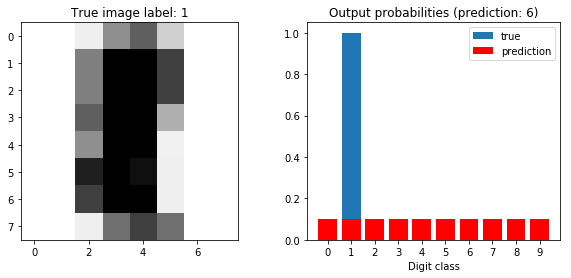

In [89]:
plot_prediction(model, sample_idx=5)

In [90]:
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.30264, train acc: 0.102, test acc: 0.096
Epoch #1, train loss: 0.38874, train acc: 0.898, test acc: 0.848
Epoch #2, train loss: 0.17554, train acc: 0.958, test acc: 0.922
Epoch #3, train loss: 0.11901, train acc: 0.974, test acc: 0.941
Epoch #4, train loss: 0.10710, train acc: 0.972, test acc: 0.930
Epoch #5, train loss: 0.07160, train acc: 0.985, test acc: 0.944
Epoch #6, train loss: 0.06139, train acc: 0.986, test acc: 0.944
Epoch #7, train loss: 0.04907, train acc: 0.991, test acc: 0.956
Epoch #8, train loss: 0.04253, train acc: 0.993, test acc: 0.959
Epoch #9, train loss: 0.03675, train acc: 0.993, test acc: 0.967
Epoch #10, train loss: 0.03185, train acc: 0.995, test acc: 0.963
Epoch #11, train loss: 0.02834, train acc: 0.995, test acc: 0.963
Epoch #12, train loss: 0.02542, train acc: 0.997, test acc: 0.963
Epoch #13, train loss: 0.02298, train acc: 0.997, test acc: 0.963
Epoch #14, train loss: 0.02028, train acc: 0.998, test acc: 0.963
Epoch #15, train 

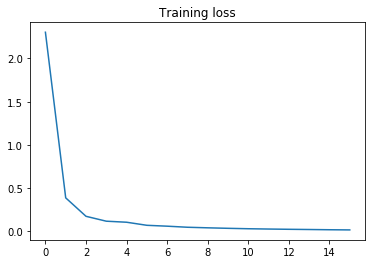

In [91]:
plt.plot(losses)
plt.title("Training loss");

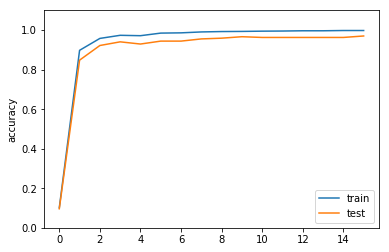

In [92]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best');

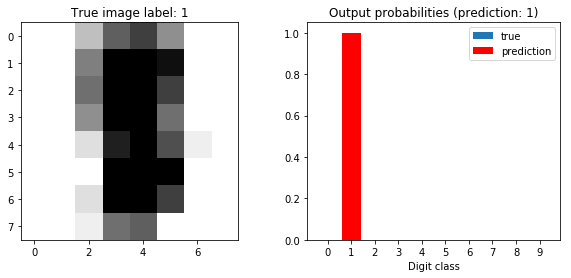

In [93]:
plot_prediction(model, sample_idx=4)

## c) Exercises

### Look at worst prediction errors

- Use numpy to find test samples for which the model made the worst predictions,
- Use the `plot_prediction` to look at the model predictions on those,
- Would you have done any better?

test losses: [2.12547038 2.55792136 2.65284669 6.8444542  7.39563707]


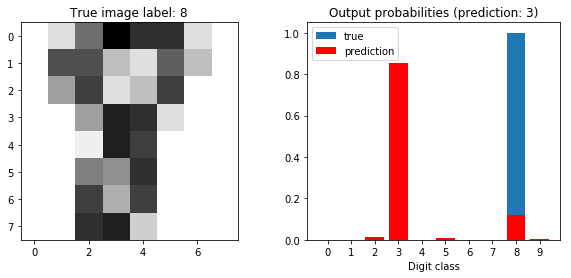

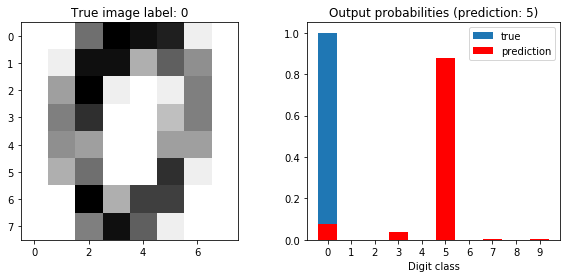

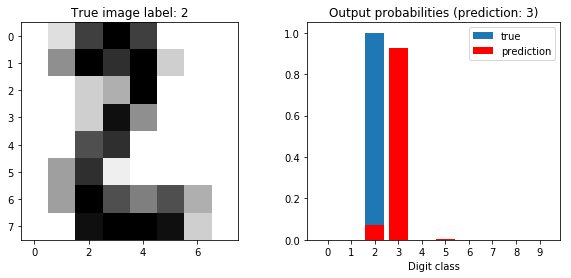

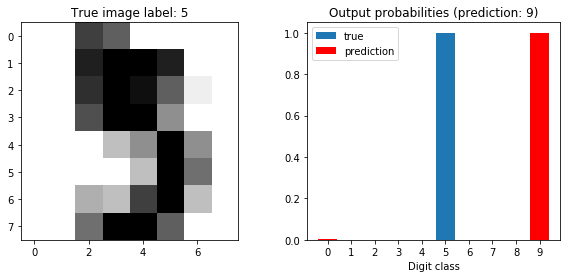

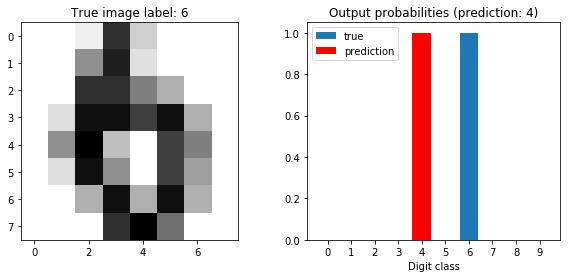

In [45]:
# %load solutions/worst_predictions.py

### Hyper parameters settings

- Experiment with different hyper parameters:
  - learning rate,
  - size of hidden layer,
  - initialization scheme: test with 0 initialization vs uniform,
  - implement other activation functions,
  - implement the support for a second hidden layer.


### Mini-batches

- The current implementations of `train` and `grad_loss` function currently only accept a single sample at a time:
    - implement the support for training with a mini-batch of 32 samples at a time instead of one,
    - experiment with different sizes of batches,
    - monitor the norm of the average gradients on the full training set at the end of each epoch.


### Momentum

- Bonus: Implement momentum


### Back to Keras

- Implement the same network architecture with Keras;

- Check that the Keras model can approximately reproduce the behavior of the Numpy model when using similar hyperparameter values (size of the model, type of activations, learning rate value and use of momentum);

- Compute the negative log likelihood of a sample 42 in the test set (can use `model.predict_proba`);

- Compute the average negative log-likelihood on the full test set.

- Compute the average negative log-likelihood  on the full training set and check that you can get the value of the loss reported by Keras.

- Is the model overfitting or underfitting? (ensure that the model has fully converged by increasing the number of epochs to 50 or more if necessary).

In [ ]:
# %load solutions/keras_model.py

In [ ]:
# %load solutions/keras_model_test_loss.py

## Homework assignments

- Watch the following video on [how to code a minimal deep learning framework](https://www.youtube.com/watch?v=o64FV-ez6Gw) that feels like a simplified version
of Keras but using numpy instead of tensorflow:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("o64FV-ez6Gw")

- **Optional**: read the following blog post on Reverse-Mode Automatic Differentiation from start to section "A simple implementation in Python" included:

  https://rufflewind.com/2016-12-30/reverse-mode-automatic-differentiation